# Task 1 - Install and import Quandl library

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear

# Task 2 - Find & Import relevant time series dataset 

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'RCBiz4yqEUwjzsRgu-yb'

In [4]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/GDPPOT')

In [5]:
data.head(5)

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [6]:
data.shape

(332, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

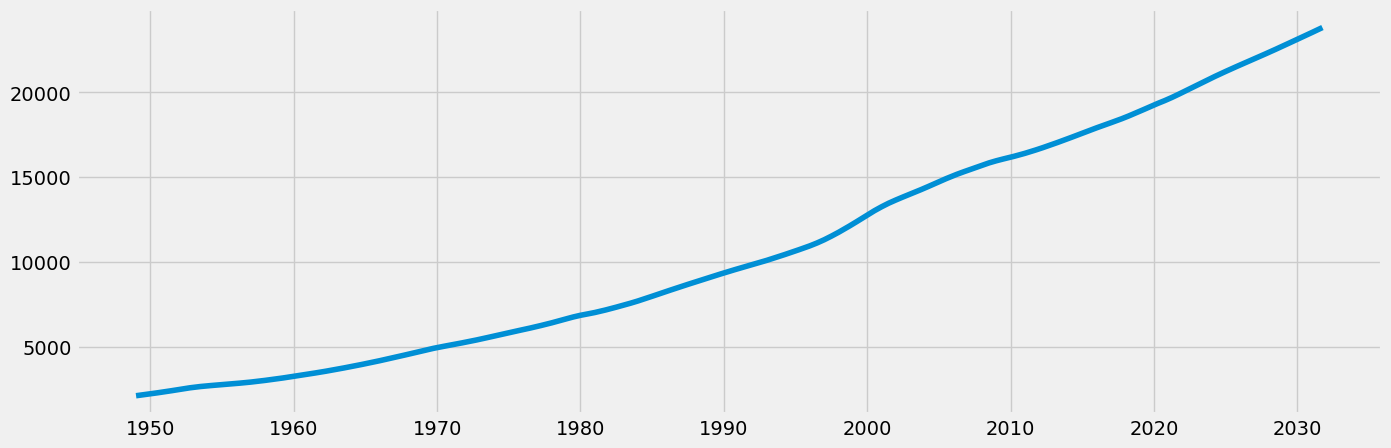

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

# The dpi argument controls the quality of the visualization here. When it's set to 100,

plt.plot(data)

# Task 3 - Subsetting, wrangling, and cleaning time-series data

In [10]:
# Resetting the index to use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
data_2.head()

,Date,Value
0,1949-01-01,2102.982630
1,1949-04-01,2130.581305
2,1949-07-01,2159.340530
3,1949-10-01,2186.844859
4,1950-01-01,2216.058359


In [17]:
data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2020-06-01')]

# To create a new subset 'data_sub' using the loc function and  “Date” column

### To forecast GDP, I have decided to use the last 20 years of historical data due to better economic conditions

In [18]:
data_sub.shape

(82, 2)

In [19]:
data_sub.head()

,Date,Value
204,2000-01-01,12757.53596
205,2000-04-01,12888.32027
206,2000-07-01,13014.42994
207,2000-10-01,13134.75698
208,2001-01-01,13249.46596


In [20]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""

data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.

data_sub.head()

,Value
datetime,
2000-01-01,12757.53596
2000-04-01,12888.32027
2000-07-01,13014.42994
2000-10-01,13134.75698
2001-01-01,13249.46596


In [22]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

Value    0
dtype: int64

In [23]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dupslicates

0

# Task 4 - Create a line chart of your data

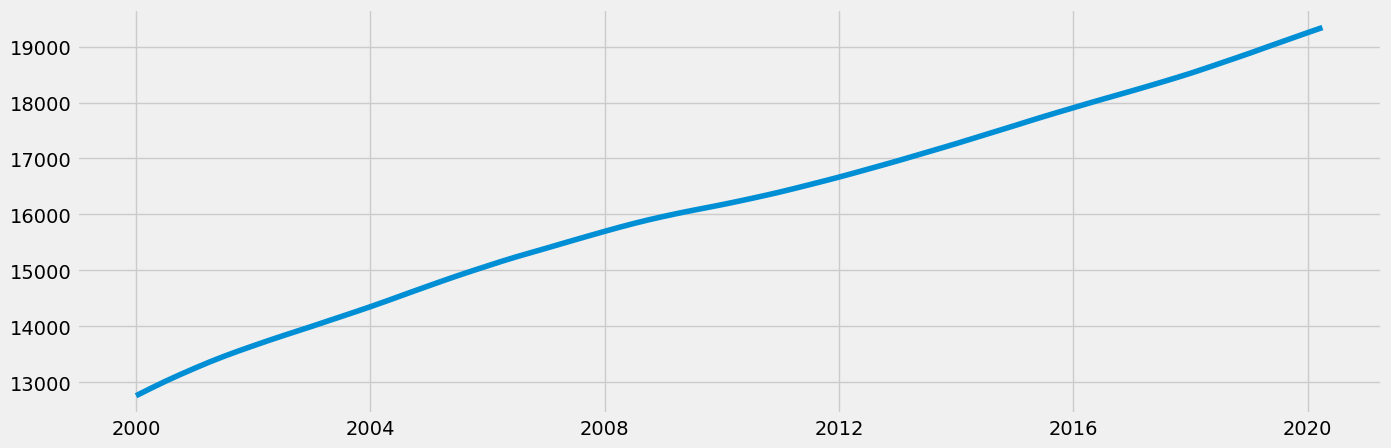

In [21]:
# Plotting the new wrangled subset of main data set

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_sub)

# Task 5 - Decompose the data's components

In [24]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

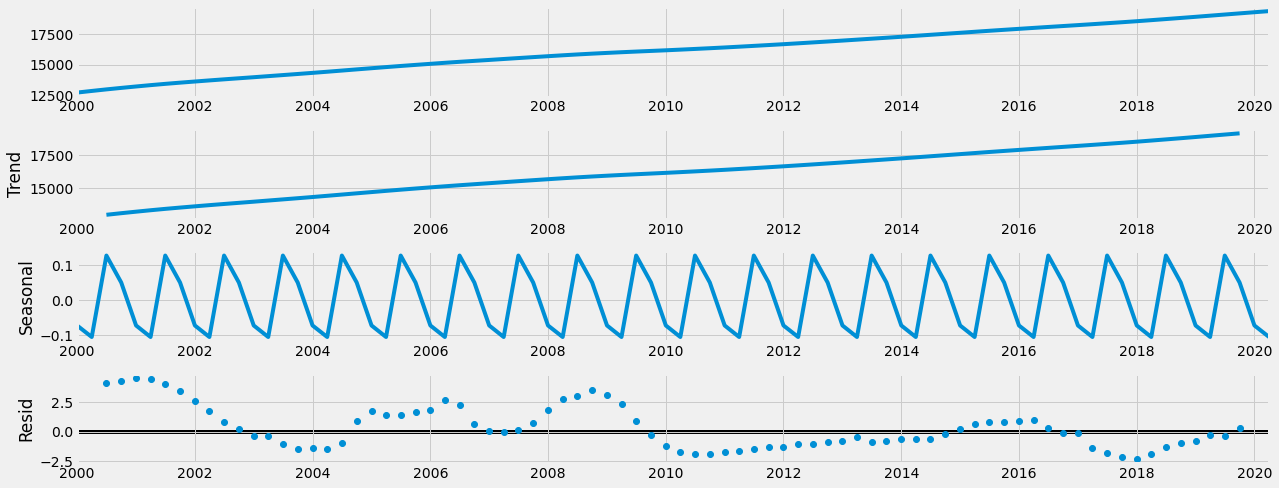

In [26]:
# Plot the separate components

decomposition.plot()

plt.show()

### First graph shows the original data itself.

### Second graph shows the underlying trend and because the dataset does not contain much noise, the level and trand graphs appear to be the same. The trend graph also displays a dominant trend because the overall trend continues to increase all the way untill the year 2020.

### Third graph shows the seasonality which is represented by spiky curves that changes at a regular interval. If there were no seasonality, then the curve would be flat

### Fourth graph shows the residual or noise in the data after the trend and seasonality have been extracted.

# Task 6 - Dickey-Fuller test for stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.282405
p-value                         0.976523
Number of Lags Used            10.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


### The null hypothesis would be the presence of a unit root

### From the DF test, we can see that the Test Statistic Value is greater than the Critical Values and hence the null hypothesis cannot be rejected. 

### This suggests that there is a unit root present in the data and thus implies that the data set is not stationary.

# Task 7 - Differencing and another Dickey-Fuller test for stationarity

In [28]:
data_diff = data_sub - data_sub.shift(1)

# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
data_diff.dropna(inplace = True) 

# To remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [30]:
data_diff.head()

,Value
datetime,
2000-04-01,130.78431
2000-07-01,126.10967
2000-10-01,120.32704
2001-01-01,114.70898
2001-04-01,108.65034


In [32]:
data_diff.columns

Index(['Value'], dtype='object')

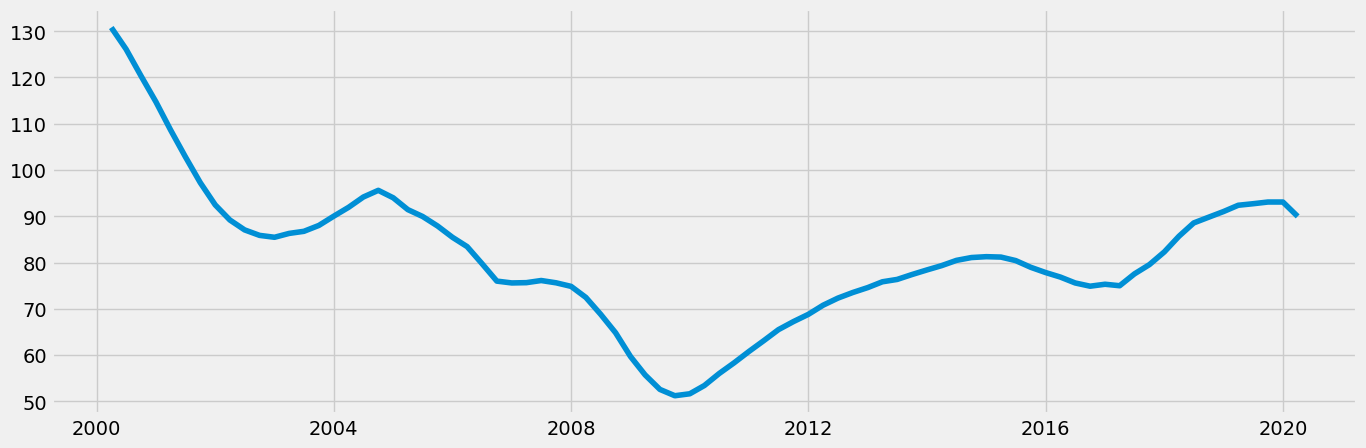

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

# Apply the test using the function on the time series

Dickey-Fuller Stationarity test:
Test Statistic                 -1.760798
p-value                         0.400091
Number of Lags Used             9.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


### From the DF test, we can see that the Test Statistic Value is STILL greater than the Critical Values and hence the null hypothesis cannot be rejected.

# Task 8 - Differencing and another Dickey-Fuller test for stationarity

In [35]:
data_diff_1 = data_diff - data_diff.shift(1)

# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1) 

In [37]:
data_diff_1.dropna(inplace = True) 

# To remove the missing values that came about as a result of the differencing.

In [38]:
data_diff_1.head()

,Value
datetime,
2000-07-01,-4.67464
2000-10-01,-5.78263
2001-01-01,-5.61806
2001-04-01,-6.05864
2001-07-01,-5.79248


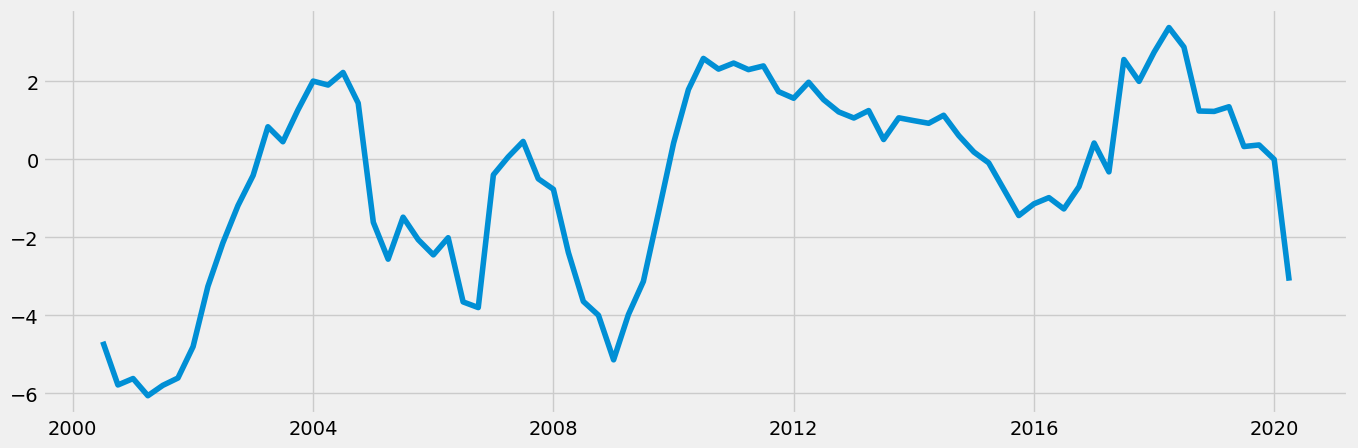

In [39]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_diff_1)

In [40]:
dickey_fuller(data_diff_1)

# Apply the test using the function on the time series

Dickey-Fuller Stationarity test:
Test Statistic                 -2.461424
p-value                         0.125144
Number of Lags Used             8.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


### From the DF test, we can see that the Test Statistic Value is LESSER than the Critical Values at 1%, 5% and 10% and hence the null hypothesis CAN be rejected.

### This implies that there are not unit roots in the dataset and also that it is now a stationary set which can be used for forecasting.

# Task 8 - Check dataset's autocorrelations

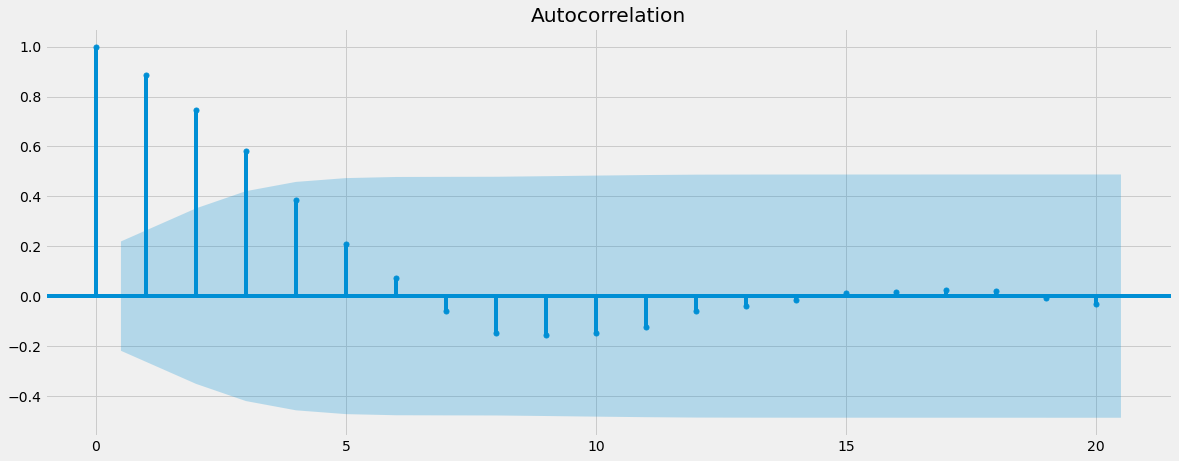

In [41]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
# Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff_1)
plt.show()

### The vertical lines indicates the lags and the blue area represents the conidence interval

### Since there are only a few lags beyond the confidence interval, it suggests that only few lags are autocorrelated

### This means that despite the Dickey-Fuller test saying that the dataset is stationary, that stationarity is weak.